## PATHS

In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'fasterrcnn_resnet_v1'
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet50_v1_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.txt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('/content/drive/MyDrive/capstone/Tensorflow','protoc')
 }

In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('/content/drive/MyDrive/capstone/Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
# for path in paths.values():
#     if not os.path.exists(path):
#         if os.name == 'posix':
#             !mkdir -p {path}
#         if os.name == 'nt':
#             !mkdir {path}

##1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# if os.name=='nt':
#     !pip install wget
#     import wget

In [ ]:
!pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 5

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12


In [ ]:
# if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
#     !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
if os.name=='posix':
    !apt-get install protobuf-compiler
    !cd /content/drive/MyDrive/capstone/Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .


if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/capstone/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.4 M

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-02-10 06:55:26.907242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 06:55:31.227845: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-10 06:55:31.228115: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-10 06:55:31.228143: W tensorfl

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
apache-beam 2

In [ ]:
import object_detection
!pip list

Package                         Version
------------------------------- ----------------------
absl-py                         1.4.0
aeppl                           0.0.33
aesara                          2.7.9
aiohttp                         3.8.3
aiosignal                       1.3.1
alabaster                       0.7.13
albumentations                  1.2.1
altair                          4.2.2
apache-beam                     2.44.0
appdirs                         1.4.4
arviz                           0.12.1
astor                           0.8.1
astropy                         4.3.1
astunparse                      1.6.3
async-timeout                   4.0.2
atari-py                        0.2.9
atomicwrites                    1.4.1
attrs                           22.2.0
audioread                       3.0.0
autograd                        1.5
avro-python3                    1.10.2
Babel                           2.11.0
backcall                        0.2.0
beautifulsoup4            

In [ ]:
# if os.name =='posix':
#     !wget {PRETRAINED_MODEL_URL}
#     !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
# if os.name == 'nt':
#     wget.download(PRETRAINED_MODEL_URL)
#     !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-01-26 13:35:00--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  45.0MB/s    in 4.8s    

2023-01-26 13:35:05 (42.2 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]

faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/chec

## cropping images from frcnn detection

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
!pip install pybboxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pybboxes as pbx
%matplotlib inline

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train/95-5-10-1_178_2.jpg"

class: polymorphonuclear score :0.9957960844039917


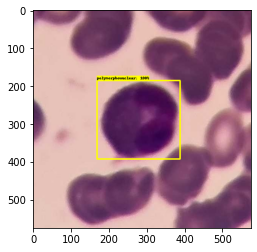

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)
print("class: {} score :{}".format(category_index[detections['detection_classes'][0]+label_id_offset]["name"],max(detections['detection_scores'])))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from PIL import Image
import pybboxes as pbx

normbb = detections['detection_boxes'][0]
w, h, _ = img.shape
[X, Y, W, H] = pbx.convert_bbox(normbb, from_type="albumentations", to_type="voc", image_size=(w,h))
img1 = Image.open(IMAGE_PATH)
img1 = img1.crop((X , Y, W, H))

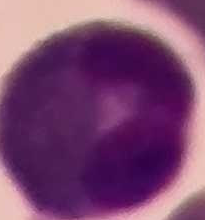

In [ ]:
img1

## Cropping and Saving

In [ ]:
# train
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pybboxes as pbx
import os
import xml.etree.ElementTree as ET

IMAGE_STORE = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped"
IMAGE_TRAIN = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train"
count = 0
for Files in os.listdir(IMAGE_TRAIN):

      if 'jpg' in Files:
        IMAGE_PATH = os.path.join(IMAGE_TRAIN, Files)
        XML_PATH = os.path.join(IMAGE_TRAIN,Files.replace('jpg', 'xml'))
        tree = ET.parse(XML_PATH)
        root = tree.getroot()

        annotations = []

        for neighbor in root.iter('annotation'):
            path = neighbor.find('path').text
            cell_type = path.split('\\')[-2]

        for neighbor in root.iter('bndbox'):
            xmin = int(neighbor.find('xmin').text)
            ymin = int(neighbor.find('ymin').text)
            xmax = int(neighbor.find('xmax').text)
            ymax = int(neighbor.find('ymax').text)

            annotations.append([xmin, ymin, xmax, ymax])
            # [X, Y, W, H] = pbx.convert_bbox(annotations, from_type="albumentations", to_type="voc", image_size=(w,h))
            [X, Y, W, H] = annotations[0]
            img1 = Image.open(IMAGE_PATH)
            img1 = img1.crop((X , Y, W, H))
            img1.save(os.path.join(IMAGE_STORE,cell_type +'_cropped_'  + str(count) ), 'JPEG')
            count+=1


In [ ]:
#test
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pybboxes as pbx
import os
import xml.etree.ElementTree as ET

IMAGE_STORE = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test_cropped"
IMAGE_TRAIN = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test"
count = 0
for Files in os.listdir(IMAGE_TRAIN):

      if 'jpg' in Files:
        IMAGE_PATH = os.path.join(IMAGE_TRAIN, Files)
        XML_PATH = os.path.join(IMAGE_TRAIN,Files.replace('jpg', 'xml'))
        tree = ET.parse(XML_PATH)
        root = tree.getroot()

        annotations = []

        for neighbor in root.iter('annotation'):
            path = neighbor.find('path').text
            cell_type = path.split('\\')[-2]

        for neighbor in root.iter('bndbox'):
            xmin = int(neighbor.find('xmin').text)
            ymin = int(neighbor.find('ymin').text)
            xmax = int(neighbor.find('xmax').text)
            ymax = int(neighbor.find('ymax').text)

            annotations.append([xmin, ymin, xmax, ymax])
            # [X, Y, W, H] = pbx.convert_bbox(annotations, from_type="albumentations", to_type="voc", image_size=(w,h))
            [X, Y, W, H] = annotations[0]
            img1 = Image.open(IMAGE_PATH)
            img1 = img1.crop((X , Y, W, H))
            img1.save(os.path.join(IMAGE_STORE,cell_type +'_cropped_'  + str(count) ), 'JPEG')
            count+=1

## Transfer Learning training process

### Preprocessing

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import sklearn
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json, Model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# # saving in two folders (train)
# import os
# import shutil
# polyc = 0
# monoc = 0

# TRAIN_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped"
# MONO_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped/MONO"
# POLY_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped/POLY"

# for im in os.listdir(TRAIN_PATH):

#   if 'Eosinophil' in im or 'Neutrophil' in im or 'Basophil' in im:
#     shutil.move(os.path.join(TRAIN_PATH,im), POLY_PATH)
#     polyc += 1

#   elif 'Lymphocyte' in im or 'Monocyte' in im:
#     shutil.move(os.path.join(TRAIN_PATH,im), MONO_PATH)
#     monoc += 1




In [ ]:
# saving in two folders (test)
# import os
# import shutil
# polyc = 0
# monoc = 0

# TRAIN_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test_cropped"
# MONO_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test_cropped/MONO"
# POLY_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test_cropped/POLY"

# for im in os.listdir(TRAIN_PATH):

#   if 'Eosinophil' in im or 'Neutrophil' in im or 'Basophil' in im:
#     shutil.move(os.path.join(TRAIN_PATH,im), POLY_PATH)
#     polyc += 1

#   elif 'Lymphocyte' in im or 'Monocyte' in im:
#     shutil.move(os.path.join(TRAIN_PATH,im), MONO_PATH)
#     monoc += 1



In [ ]:
# loading images ()
import cv2 as cv
import os
import numpy as np
from random import shuffle

grth_path = "/content/GrTh/Original"
bccd_path = "/content/drive/MyDrive/capstone/bccd_wbc"
MONO_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped/MONO"
POLY_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped/POLY"


train_1 = []
label_1 = []
dict1 = {'Lymphocyte': 1, 'Monocyte': 0}
train_2 = []
dict2 = {'Eosinophil': 0, 'Neutrophil': 1, 'Basophil': 2}
label_2 = []

for i in os.listdir(bccd_path):
  if i in dict1.keys():
    count = 0
    for im in os.listdir(os.path.join(bccd_path,i)):
        img = cv.imread(os.path.join(bccd_path,i ,im))
        img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
        #img = img // 255.0
        train_1.append(img)
        label_1.append(dict1[i])
        # count+=1
        # if count == 300:
        #   break

  elif i in dict2.keys():
    count1 = 0
    for im in os.listdir(os.path.join(bccd_path,i)):
        img = cv.imread(os.path.join(bccd_path,i ,im))
        img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
        #img = img // 255.0
        train_2.append(img)
        label_2.append(dict2[i])
        # count1 += 1
        # if count1 == 300:
        #   break
  else:
    print(f"ERROR in {i}")


# for i in os.listdir(grth_path):
#   if i in dict1.keys():
#     for im in os.listdir(os.path.join(grth_path,i)):
#         img = cv.imread(os.path.join(grth_path,i ,im))
#         img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#         # img = img // 255.0
#         train_1.append(img)
#         label_1.append(dict1[i])

#   elif i in dict2.keys():
#     for im in os.listdir(os.path.join(grth_path,i)):
#         img = cv.imread(os.path.join(grth_path,i ,im))
#         img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#         # img = img // 255.0
#         train_2.append(img)
#         label_2.append(dict2[i])
#   else:
#     print(f"ERROR in {i}")


# sh1 = os.listdir(MONO_PATH)
# shuffle(sh1)

# for im in sh1:

#       img = cv.imread(os.path.join(MONO_PATH, im))
#       img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#       img = img // 255.0
#       train_1.append(img)
#       label_1.append(dict1[im.split("_")[0]])

# sh2 = os.listdir(POLY_PATH)
# shuffle(sh2)

# for im in sh2:

#       img = cv.imread(os.path.join(POLY_PATH, im))
#       img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#       img = img // 255.0
#       train_2.append(img)
#       label_2.append(dict2[im.split("_")[0]])

ERROR in .ipynb_checkpoints


In [ ]:
# # loading images ()
# import cv2 as cv
# import os
# import numpy as np
# from random import shuffle

# MONO_PATH_cropped = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped/MONO"
# POLY_PATH_croppped = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/train_cropped/POLY"


# train_1 = []
# label_1 = []
# dict1 = {'Lymphocyte': 1, 'Monocyte': 0}
# train_2 = []
# dict2 = {'Eosinophil': 0, 'Neutrophil': 1, 'Basophil': 2}
# label_2 = []

# sh1 = os.listdir(MONO_PATH)
# shuffle(sh1)

# for im in sh1:

#       img = cv.imread(os.path.join(MONO_PATH, im))
#       img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#       img = img // 255.0
#       train_1.append(img)
#       label_1.append(dict1[im.split("_")[0]])

# sh2 = os.listdir(POLY_PATH)
# shuffle(sh2)

# for im in sh2:

#       img = cv.imread(os.path.join(POLY_PATH, im))
#       img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#       img = img // 255.0
#       train_2.append(img)
#       label_2.append(dict2[im.split("_")[0]])

In [ ]:
# import cv2 as cv
# import os
# import numpy as np


# MONO_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test_cropped/MONO"
# POLY_PATH = "/content/drive/MyDrive/capstone/Tensorflow/workspace/images/test_cropped/POLY"

# test_1 = []
# label_test_1 = []
# dict1 = {'Lymphocyte': 1, 'Monocyte': 0}
# test_2 = []
# dict2 = {'Eosinophil': 0, 'Neutrophil': 1, 'Basophil': 2}
# label_test_2 = []

# sh1 = os.listdir(MONO_PATH)
# shuffle(sh1)

# for im in sh1:

#       img = cv.imread(os.path.join(MONO_PATH, im))
#       img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#       img = img // 255.0
#       test_1.append(img)
#       label_test_1.append(dict1[im.split("_")[0]])

# sh2 = os.listdir(POLY_PATH)
# shuffle(sh2)

# for im in sh2:

#       img = cv.imread(os.path.join(POLY_PATH, im))
#       img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
#       img = img // 255.0
#       test_2.append(img)
#       label_test_2.append(dict2[im.split("_")[0]])

In [ ]:
# train_1 = np.array(train_1)
# test_1 = np.array(test_1)

In [ ]:
# label_1 = tf.keras.utils.to_categorical(label_1, 2)
# label_test_1 = tf.keras.utils.to_categorical(label_test_1, 2)

### VGG


In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def create_model(input_shape, n_classes, optimizer='adam', fine_tune=0):

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

###VGG model 1

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=2

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_1 = np.array(train_1)
label_1 = tf.keras.utils.to_categorical(label_1, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_1, label_1, test_size=0.2, random_state=42)


In [ ]:
datagen.fit(X_train)

In [ ]:
#model 1 ---- Lymphocyte and Monocyte
vgg_history = vgg_model.fit_generator(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

<ipython-input-43-9e1bf41bed18>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg_history = vgg_model.fit_generator(datagen.flow(X_train, y_train,
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20
28/28 [==============================] - 12s 432ms/step - loss: 0.7352 - accuracy: 0.6942 - val_loss: 0.3204 - val_accuracy: 0.8750
Epoch 2/20
28/28 [==============================] - 12s 431ms/step - loss: 0.3358 - accuracy: 0.8594 - val_loss: 0.2723 - val_accuracy: 0.8929
Epoch 3/20
28/28 [==============================] - 11s 406ms/step - loss: 0.2645 - accuracy: 0.8895 - val_loss: 0.2974 - val_accuracy: 0.8393
Epoch 4/20
28/28 [==============================] - 11s 392ms/step - loss: 0.3819 - accuracy: 0.8359 - val_loss: 0.1826 - val_accuracy: 0.9107
Epoch 5/20
28/28 [==============================] - 12s 419ms/step - loss: 0.2226 - accuracy: 0.9152 - val_loss: 0.4162 - val_accuracy: 0.7857
Epoch 6/20
28/28 [==============================] - 12s 425ms/step - loss: 0.2269 - accuracy: 0.9163 - val_loss: 0.2695 - val_accuracy: 0.8036
Epoch 7/20
28/28 [==============================] - 12s 419ms/step - loss: 0.2343 - accuracy: 0.9018 - val_loss: 0.1760 - val_accuracy: 0.9286

In [ ]:
score = vgg_model.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = vgg_model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.9285714030265808 

9/9 [==============================] - 1s 120ms/step

               precision    recall  f1-score   support

           0       1.00      0.86      0.92       140
           1       0.88      1.00      0.93       140

    accuracy                           0.93       280
   macro avg       0.94      0.93      0.93       280
weighted avg       0.94      0.93      0.93       280



In [ ]:
vgg_model.save('/content/drive/MyDrive/capstone/Tensorflow/workspace/vgg16/checkpoints')

In [ ]:
vgg_model.save("/content/drive/MyDrive/capstone/Tensorflow/workspace/vgg16/checkpoints/vgg_bestmodel_1.h5")

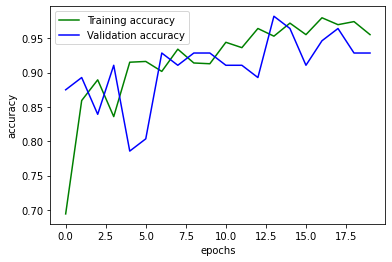

In [ ]:
epochs = range(0,20)
plt.plot(epochs,vgg_history.history['accuracy'],'g',label='Training accuracy')
plt.plot(epochs,vgg_history.history['val_accuracy'],'b',label="Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###VGG model 2


In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=3
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model_2 = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


In [ ]:
#model 2 ----- polymorphonuclear

train_2 = np.array(train_2)
label_2 = tf.keras.utils.to_categorical(label_2, 3)

from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_2, label_2, test_size=0.33, random_state=42)

datagen.fit(X_train_2)

vgg_history = vgg_model_2.fit(datagen.flow(X_train_2, y_train_2,
         subset='training'),
         validation_data=datagen.flow(X_test_2,y_test_2,
         subset='validation'),
         epochs=20)


Epoch 1/20
40/40 [==============================] - 36s 528ms/step - loss: 3.7110 - accuracy: 0.5231 - val_loss: 0.5264 - val_accuracy: 0.8052
Epoch 2/20
40/40 [==============================] - 17s 422ms/step - loss: 0.5165 - accuracy: 0.7536 - val_loss: 0.4952 - val_accuracy: 0.8182
Epoch 3/20
40/40 [==============================] - 17s 419ms/step - loss: 0.4296 - accuracy: 0.7895 - val_loss: 0.5297 - val_accuracy: 0.7987
Epoch 4/20
40/40 [==============================] - 18s 461ms/step - loss: 0.4269 - accuracy: 0.8030 - val_loss: 0.4154 - val_accuracy: 0.8312
Epoch 5/20
40/40 [==============================] - 17s 418ms/step - loss: 0.3580 - accuracy: 0.8198 - val_loss: 0.4088 - val_accuracy: 0.7792
Epoch 6/20
40/40 [==============================] - 17s 429ms/step - loss: 0.3943 - accuracy: 0.8070 - val_loss: 0.3192 - val_accuracy: 0.8377
Epoch 7/20
40/40 [==============================] - 17s 421ms/step - loss: 0.3621 - accuracy: 0.8214 - val_loss: 0.3868 - val_accuracy: 0.8052

In [ ]:
score = vgg_model_2.evaluate(X_test_2,y_test_2, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = vgg_model_2.predict(X_test_2)
print('\n', sklearn.metrics.classification_report(np.where(y_test_2 > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.8137128353118896 

25/25 [==============================] - 3s 122ms/step

               precision    recall  f1-score   support

           0       0.70      0.71      0.70       241
           1       0.75      0.82      0.78       253
           2       1.00      0.90      0.95       279

    accuracy                           0.81       773
   macro avg       0.82      0.81      0.81       773
weighted avg       0.82      0.81      0.82       773



In [ ]:
vgg_model_2.save_weights("/content/drive/MyDrive/capstone/Tensorflow/workspace/vgg16/checkpoints/vgg_bestmodel_2")

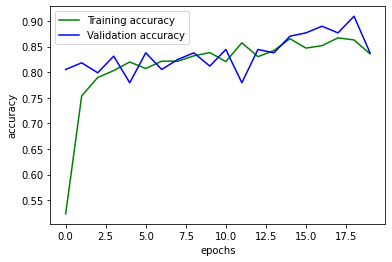

In [ ]:
epochs = range(0,20)
plt.plot(epochs,vgg_history.history['accuracy'],'g',label='Training accuracy')
plt.plot(epochs,vgg_history.history['val_accuracy'],'b',label="Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model1 = load_model("/content/drive/MyDrive/capstone/Tensorflow/workspace/vgg16/checkpoints/vgg_bestmodel_1.h5")

In [ ]:
score = model1.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model1.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.5154638886451721 

4/4 [==============================] - 1s 132ms/step

               precision    recall  f1-score   support

           0       0.52      1.00      0.68        50
           1       0.00      0.00      0.00        47

    accuracy                           0.52        97
   macro avg       0.26      0.50      0.34        97
weighted avg       0.27      0.52      0.35        97



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Resnet model 2


In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_2 = np.array(train_2)
label_2 = tf.keras.utils.to_categorical(label_2, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_2, label_2, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model

In [ ]:
base_model = ResNet50(include_top=False, weights="imagenet")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation="relu")(x)
x = Dense(1072, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

Epoch 1/20
42/42 [==============================] - 23s 450ms/step - loss: 1.6580 - acc: 0.3363 - val_loss: 1.1013 - val_acc: 0.3095
Epoch 2/20
42/42 [==============================] - 16s 387ms/step - loss: 1.1042 - acc: 0.3147 - val_loss: 1.0987 - val_acc: 0.2976
Epoch 3/20
42/42 [==============================] - 16s 391ms/step - loss: 1.1004 - acc: 0.3266 - val_loss: 1.0950 - val_acc: 0.3929
Epoch 4/20
42/42 [==============================] - 16s 388ms/step - loss: 1.0997 - acc: 0.3162 - val_loss: 1.0989 - val_acc: 0.2976
Epoch 5/20
42/42 [==============================] - 16s 386ms/step - loss: 1.0991 - acc: 0.3333 - val_loss: 1.0998 - val_acc: 0.3095
Epoch 6/20
42/42 [==============================] - 16s 386ms/step - loss: 1.0991 - acc: 0.3051 - val_loss: 1.0991 - val_acc: 0.2976
Epoch 7/20
42/42 [==============================] - 17s 408ms/step - loss: 1.0992 - acc: 0.3177 - val_loss: 1.0979 - val_acc: 0.3929
Epoch 8/20
42/42 [==============================] - 16s 387ms/step - 

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.369047611951828 

14/14 [==============================] - 2s 91ms/step

               precision    recall  f1-score   support

           0       0.35      0.63      0.45       131
           1       0.21      0.20      0.20       137
           2       0.78      0.30      0.44       152

    accuracy                           0.37       420
   macro avg       0.45      0.38      0.36       420
weighted avg       0.46      0.37      0.36       420



In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_2 = np.array(train_2)
label_2 = tf.keras.utils.to_categorical(label_2, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_2, label_2, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model

In [ ]:
base_model = ResNet50(include_top=False, weights="imagenet")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation="relu")(x)
x = Dense(1072, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

Epoch 1/20
42/42 [==============================] - 23s 450ms/step - loss: 1.6580 - acc: 0.3363 - val_loss: 1.1013 - val_acc: 0.3095
Epoch 2/20
42/42 [==============================] - 16s 387ms/step - loss: 1.1042 - acc: 0.3147 - val_loss: 1.0987 - val_acc: 0.2976
Epoch 3/20
42/42 [==============================] - 16s 391ms/step - loss: 1.1004 - acc: 0.3266 - val_loss: 1.0950 - val_acc: 0.3929
Epoch 4/20
42/42 [==============================] - 16s 388ms/step - loss: 1.0997 - acc: 0.3162 - val_loss: 1.0989 - val_acc: 0.2976
Epoch 5/20
42/42 [==============================] - 16s 386ms/step - loss: 1.0991 - acc: 0.3333 - val_loss: 1.0998 - val_acc: 0.3095
Epoch 6/20
42/42 [==============================] - 16s 386ms/step - loss: 1.0991 - acc: 0.3051 - val_loss: 1.0991 - val_acc: 0.2976
Epoch 7/20
42/42 [==============================] - 17s 408ms/step - loss: 1.0992 - acc: 0.3177 - val_loss: 1.0979 - val_acc: 0.3929
Epoch 8/20
42/42 [==============================] - 16s 387ms/step - 

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.369047611951828 

14/14 [==============================] - 2s 91ms/step

               precision    recall  f1-score   support

           0       0.35      0.63      0.45       131
           1       0.21      0.20      0.20       137
           2       0.78      0.30      0.44       152

    accuracy                           0.37       420
   macro avg       0.45      0.38      0.36       420
weighted avg       0.46      0.37      0.36       420



### Predicting images

### MobileNet

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=2, activation='softmax')(x)

In [ ]:
for layer in mobile.layers[:-22]:
    layer.trainable = False

In [ ]:
model = Model(inputs = mobile.input, outputs = output)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
generator.flow(X_test_1, y_test_1, batch_size = 8)

In [ ]:
#model1
model.fit(x=generator.flow(X_train_1, y_train_1, batch_size = 32),
            validation_data= generator.flow(X_test_1, y_test_1, batch_size = 8),
            epochs=50,
            verbose=2
)

Epoch 1/50


KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(X_test_1,y_test_1, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model.predict(X_test_1)
print('\n', sklearn.metrics.classification_report(np.where(y_test_1 > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.5 

1/1 [==============================] - 0s 24ms/step

               precision    recall  f1-score   support

           0       0.50      1.00      0.67        16
           1       0.00      0.00      0.00        16

    accuracy                           0.50        32
   macro avg       0.25      0.50      0.33        32
weighted avg       0.25      0.50      0.33        32



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=2, activation='softmax')(x)

In [ ]:
for layer in mobile.layers[:-22]:
    layer.trainable = False

In [ ]:
model2 = Model(inputs = mobile.input, outputs = output)

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
#model1
model2.fit(x=generator.flow(X_train_2, y_train_2, batch_size = 32),
            validation_data= generator.flow(X_test_2, y_test_2, batch_size = 8),
            epochs=50,
            verbose=2
)

Epoch 1/50
4/4 - 6s - loss: 0.7252 - accuracy: 0.6094 - val_loss: 0.2844 - val_accuracy: 0.8750 - 6s/epoch - 1s/step
Epoch 2/50
4/4 - 2s - loss: 0.1927 - accuracy: 0.9453 - val_loss: 0.1657 - val_accuracy: 0.9375 - 2s/epoch - 423ms/step
Epoch 3/50
4/4 - 2s - loss: 0.1013 - accuracy: 0.9766 - val_loss: 0.1077 - val_accuracy: 1.0000 - 2s/epoch - 504ms/step
Epoch 4/50
4/4 - 2s - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.1231 - val_accuracy: 0.9375 - 2s/epoch - 624ms/step
Epoch 5/50
4/4 - 2s - loss: 0.0548 - accuracy: 0.9922 - val_loss: 0.0964 - val_accuracy: 0.9375 - 2s/epoch - 431ms/step
Epoch 6/50
4/4 - 2s - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9062 - 2s/epoch - 431ms/step
Epoch 7/50
4/4 - 2s - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9688 - 2s/epoch - 513ms/step
Epoch 8/50
4/4 - 3s - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0668 - val_accuracy: 0.9688 - 3s/epoch - 655ms/step
Epoch 9/50
4/4 - 4s - loss: 0.0107 - accura

In [ ]:
score = model2.evaluate(X_test_2,y_test_2, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model2.predict(X_test_1)
print('\n', sklearn.metrics.classification_report(np.where(y_test_2 > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.6875 

1/1 [==============================] - 1s 966ms/step

               precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.68      0.81      0.74        16

    accuracy                           0.72        32
   macro avg       0.73      0.72      0.72        32
weighted avg       0.73      0.72      0.72        32



## new try

### vgg model 1

In [ ]:
!unzip /content/drive/MyDrive/capstone/finalDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: finalDataset/BASOPHILS/cr_01_BA_00498.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00499.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00500.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00501.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00502.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00503.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00504.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00505.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00506.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00507.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00508.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00509.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00510.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00511.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00512.png  
  inflating: finalDataset/BASOPHILS/cr_01_BA_00513.png  
  inflating: finalDataset/BASOPHILS/c

In [ ]:
import cv2 as cv
import os
import numpy as np

dataPath = "/content/finalDataset"

train_1 = []
label_1 = []
dict1 = {'LYMPHOCYTES': 1, 'MONOCYTES': 0}
train_2 = []
dict2 = {'EOSINOPHILS': 0, 'NEUTROPHILS': 1, 'BASOPHILS': 2}
label_2 = []

for i in os.listdir(dataPath):
  if i in dict1.keys():
    count = 0
    for im in os.listdir(os.path.join(dataPath,i)):
        img = cv.imread(os.path.join(dataPath,i ,im))
        img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
        #img = img // 255.0
        train_1.append(img)
        label_1.append(dict1[i])
        # count+=1
        # if count == 300:
        #   break

  elif i in dict2.keys():
    count1 = 0
    for im in os.listdir(os.path.join(dataPath,i)):
        img = cv.imread(os.path.join(dataPath,i ,im))
        img = cv.resize(img, (224,224), interpolation = cv.INTER_LINEAR)
        #img = img // 255.0
        train_2.append(img)
        label_2.append(dict2[i])
        # count1 += 1
        # if count1 == 300:
        #   break
  else:
    print(f"ERROR in {i}")


In [ ]:
len(train_2)

3428

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import sklearn
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json, Model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
def create_model(input_shape, n_classes, optimizer='adam', fine_tune=0):

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# import os
# for i in os.listdir("/content/finalDataset"):
#     cellTypePath = os.path.join("/content/finalDataset", i)
#     for j in os.listdir(cellTypePath):
#         imgPath = os.path.join(cellTypePath, j)
#         os.rename(imgPath, imgPath + "_" + i)

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=2

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
train_1 = np.array(train_1)
label_1 = tf.keras.utils.to_categorical(label_1, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_1, label_1, test_size=0.2, random_state=42)


In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
#model 1 ---- Lymphocyte and Monocyte
vgg_history = vgg_model.fit(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

Epoch 1/20
46/46 [==============================] - 23s 457ms/step - loss: 0.7322 - accuracy: 0.7620 - val_loss: 0.1783 - val_accuracy: 0.9121
Epoch 2/20
46/46 [==============================] - 19s 417ms/step - loss: 0.1735 - accuracy: 0.9268 - val_loss: 0.0951 - val_accuracy: 0.9670
Epoch 3/20
46/46 [==============================] - 21s 450ms/step - loss: 0.1275 - accuracy: 0.9508 - val_loss: 0.0933 - val_accuracy: 0.9560
Epoch 4/20
46/46 [==============================] - 19s 419ms/step - loss: 0.1104 - accuracy: 0.9576 - val_loss: 0.0914 - val_accuracy: 0.9670
Epoch 5/20
46/46 [==============================] - 20s 430ms/step - loss: 0.0914 - accuracy: 0.9665 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 6/20
46/46 [==============================] - 20s 438ms/step - loss: 0.1022 - accuracy: 0.9624 - val_loss: 0.0542 - val_accuracy: 0.9890
Epoch 7/20
46/46 [==============================] - 20s 425ms/step - loss: 0.0641 - accuracy: 0.9788 - val_loss: 0.0548 - val_accuracy: 0.9560

In [ ]:
score = vgg_model.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = vgg_model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.8008752465248108 

15/15 [==============================] - 2s 130ms/step

               precision    recall  f1-score   support

           0       0.73      0.96      0.83       230
           1       0.94      0.64      0.76       227

    accuracy                           0.80       457
   macro avg       0.83      0.80      0.80       457
weighted avg       0.83      0.80      0.80       457



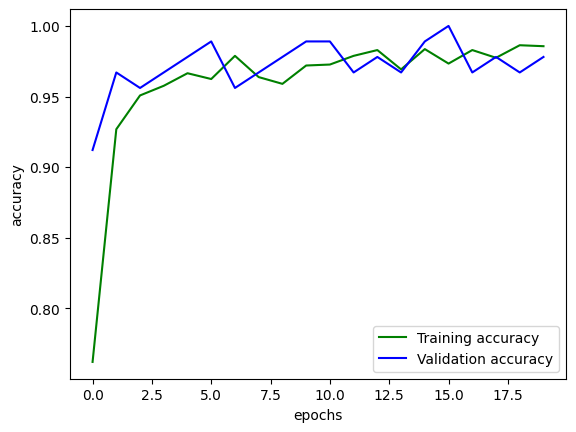

In [ ]:
epochs = range(0,20)
plt.plot(epochs,vgg_history.history['accuracy'],'g',label='Training accuracy')
plt.plot(epochs,vgg_history.history['val_accuracy'],'b',label="Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### vgg model 2

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=3
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model_2 = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


In [ ]:
train_2 = np.array(train_2)
label_2 = tf.keras.utils.to_categorical(label_2, 3)

In [ ]:
#model 2 ----- polymorphonuclear

from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_2, label_2, test_size=0.33, random_state=42)

datagen.fit(X_train_2)

vgg_history = vgg_model_2.fit(datagen.flow(X_train_2, y_train_2,
         subset='training'),
         validation_data=datagen.flow(X_test_2,y_test_2,
         subset='validation'),
         epochs=20)


Epoch 1/20
58/58 [==============================] - 41s 476ms/step - loss: 0.5147 - accuracy: 0.8253 - val_loss: 0.1121 - val_accuracy: 0.9646
Epoch 2/20
58/58 [==============================] - 26s 456ms/step - loss: 0.1142 - accuracy: 0.9570 - val_loss: 0.0996 - val_accuracy: 0.9602
Epoch 3/20
58/58 [==============================] - 25s 430ms/step - loss: 0.0751 - accuracy: 0.9717 - val_loss: 0.1096 - val_accuracy: 0.9735
Epoch 4/20
58/58 [==============================] - 25s 433ms/step - loss: 0.0569 - accuracy: 0.9799 - val_loss: 0.0554 - val_accuracy: 0.9779
Epoch 5/20
58/58 [==============================] - 25s 431ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.1410 - val_accuracy: 0.9425
Epoch 6/20
58/58 [==============================] - 25s 428ms/step - loss: 0.0900 - accuracy: 0.9701 - val_loss: 0.0539 - val_accuracy: 0.9779
Epoch 7/20
58/58 [==============================] - 26s 452ms/step - loss: 0.0678 - accuracy: 0.9744 - val_loss: 0.0272 - val_accuracy: 0.9912

In [ ]:
score = vgg_model_2.evaluate(X_test_2,y_test_2, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = vgg_model_2.predict(X_test_2)
print('\n', sklearn.metrics.classification_report(np.where(y_test_2 > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.8957597017288208 

36/36 [==============================] - 5s 139ms/step

               precision    recall  f1-score   support

           0       0.93      0.71      0.81       339
           1       0.82      0.97      0.89       368
           2       0.95      0.97      0.96       425

    accuracy                           0.90      1132
   macro avg       0.90      0.89      0.89      1132
weighted avg       0.90      0.90      0.89      1132



In [ ]:
vgg_model_2.save_weights("/content/drive/MyDrive/capstone/Tensorflow/workspace/vgg16/checkpoints/vgg_bestmodel_2")

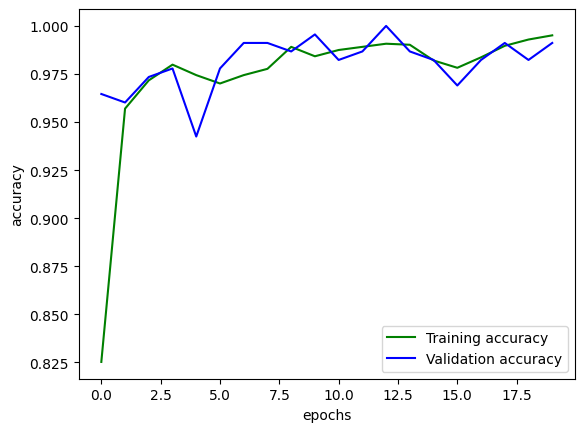

In [ ]:
epochs = range(0,20)
plt.plot(epochs,vgg_history.history['accuracy'],'g',label='Training accuracy')
plt.plot(epochs,vgg_history.history['val_accuracy'],'b',label="Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### resnet 1

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_1 = np.array(train_1)
label_1 = tf.keras.utils.to_categorical(label_1, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_1, label_1, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model

In [ ]:
base_model = ResNet50(include_top=False, weights="imagenet")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation="relu")(x)
x = Dense(1072, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["acc"])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20
46/46 [==============================] - 38s 464ms/step - loss: 0.7488 - acc: 0.5000 - val_loss: 0.6856 - val_acc: 0.5495
Epoch 2/20
46/46 [==============================] - 18s 397ms/step - loss: 0.7086 - acc: 0.5075 - val_loss: 0.8391 - val_acc: 0.5495
Epoch 3/20
46/46 [==============================] - 18s 399ms/step - loss: 0.7578 - acc: 0.4904 - val_loss: 0.6886 - val_acc: 0.4725
Epoch 4/20
46/46 [==============================] - 19s 414ms/step - loss: 0.7061 - acc: 0.4952 - val_loss: 0.6790 - val_acc: 0.5495
Epoch 5/20
46/46 [==============================] - 19s 408ms/step - loss: 0.6954 - acc: 0.5356 - val_loss: 0.7062 - val_acc: 0.4505
Epoch 6/20
46/46 [==============================] - 19s 412ms/step - loss: 0.7086 - acc: 0.5096 - val_loss: 0.7001 - val_acc: 0.4615
Epoch 7/20
46/46 [==============================] - 19s 408ms/step - loss: 0.7412 - acc: 0.5192 - val_loss: 0.8173 - val_acc: 0.4505
Epoch 8/20
46/46 [==============================] - 20s 425ms/step - 

In [ ]:
dnn_model = Sequential()

imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(224,224,3),
pooling='avg',classes=2,
weights='imagenet')
for layer in imported_model.layers:
    layer.trainable=False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(2, activation='softmax'))

dnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen.fit(X_train)

In [ ]:
history = dnn_model.fit_generator(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

<ipython-input-39-32761e4e5228>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = dnn_model.fit_generator(datagen.flow(X_train, y_train,


Epoch 1/20
46/46 [==============================] - 26s 464ms/step - loss: 0.5953 - accuracy: 0.7196 - val_loss: 0.3860 - val_accuracy: 0.8681
Epoch 2/20
46/46 [==============================] - 18s 397ms/step - loss: 0.3522 - accuracy: 0.8584 - val_loss: 0.2968 - val_accuracy: 0.9341
Epoch 3/20
46/46 [==============================] - 19s 403ms/step - loss: 0.3070 - accuracy: 0.8776 - val_loss: 0.2883 - val_accuracy: 0.8901
Epoch 4/20
46/46 [==============================] - 18s 398ms/step - loss: 0.2890 - accuracy: 0.8817 - val_loss: 0.2157 - val_accuracy: 0.9231
Epoch 5/20
46/46 [==============================] - 20s 437ms/step - loss: 0.3105 - accuracy: 0.8639 - val_loss: 0.3862 - val_accuracy: 0.8352
Epoch 6/20
46/46 [==============================] - 18s 395ms/step - loss: 0.2571 - accuracy: 0.8899 - val_loss: 0.2152 - val_accuracy: 0.9231
Epoch 7/20
46/46 [==============================] - 19s 407ms/step - loss: 0.2305 - accuracy: 0.9083 - val_loss: 0.1549 - val_accuracy: 0.9341

In [ ]:
score = dnn_model.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = dnn_model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.6761487722396851 

15/15 [==============================] - 2s 89ms/step

               precision    recall  f1-score   support

           0       0.63      0.86      0.72       227
           1       0.78      0.50      0.61       230

    accuracy                           0.68       457
   macro avg       0.70      0.68      0.67       457
weighted avg       0.70      0.68      0.67       457



### resnet 2

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_2 = np.array(train_2)
label_2 = tf.keras.utils.to_categorical(label_2, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_2, label_2, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model

In [ ]:
dnn_model = Sequential()

imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(224,224,3),
pooling='avg',classes=3,
weights='imagenet')
for layer in imported_model.layers:
    layer.trainable=False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(3, activation='softmax'))

dnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen.fit(X_train)

In [ ]:
history = dnn_model.fit_generator(datagen.flow(X_train, y_train,
         subset='training'),
         validation_data=datagen.flow(X_test,y_test,
         subset='validation'),
         epochs=20)

<ipython-input-8-32761e4e5228>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = dnn_model.fit_generator(datagen.flow(X_train, y_train,
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20
69/69 [==============================] - 48s 461ms/step - loss: 1.1637 - accuracy: 0.3665 - val_loss: 1.0199 - val_accuracy: 0.4745
Epoch 2/20
69/69 [==============================] - 29s 423ms/step - loss: 1.0731 - accuracy: 0.4558 - val_loss: 1.0531 - val_accuracy: 0.4526
Epoch 3/20
69/69 [==============================] - 34s 496ms/step - loss: 0.9921 - accuracy: 0.5050 - val_loss: 0.9424 - val_accuracy: 0.5839
Epoch 4/20
69/69 [==============================] - 30s 439ms/step - loss: 0.9627 - accuracy: 0.5725 - val_loss: 0.9208 - val_accuracy: 0.4599
Epoch 5/20
69/69 [==============================] - 30s 428ms/step - loss: 0.9253 - accuracy: 0.6153 - val_loss: 0.9234 - val_accuracy: 0.5328
Epoch 6/20
69/69 [==============================] - 29s 426ms/step - loss: 0.8784 - accuracy: 0.6376 - val_loss: 0.8991 - val_accuracy: 0.5912
Epoch 7/20
69/69 [==============================] - 30s 432ms/step - loss: 0.8598 - accuracy: 0.6531 - val_loss: 0.8632 - val_accuracy: 0.7153

In [ ]:
score = dnn_model.evaluate(X_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = dnn_model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1)))


Keras CNN - accuracy: 0.3921282887458801 

22/22 [==============================] - 6s 95ms/step

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.00      0.00      0.00       212
           2       0.39      1.00      0.56       269

    accuracy                           0.39       686
   macro avg       0.13      0.33      0.19       686
weighted avg       0.15      0.39      0.22       686



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### prac


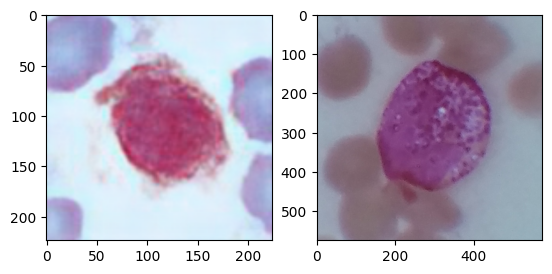

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
plt.subplot(1,2,1)
plt.imshow(train_1[0])
img = cv.imread("/content/finalDataset/BASOPHILS/20190526_163027_0.jpg")
plt.subplot(1,2,2)
plt.imshow(img)